## MSCA 31009 Machine Learning & Predictive Analytics
## Assignment 2
## Duo Zhou

### Part A: Data Cleaning

1) We will increase the complexity of our model slightly by increasing the number of features. Keep the following features:

- T_degC (water temperature)
- Salnty (salinity of water)
- STheta (density of water)
- O2ml_L (milliliters of dissolved oxygen per liter of water)
- Depthm (depth in meters)

2) Remove NaN / NA values from dataset (prior to building train/test sets) (same as HW #1):
- Shape of your data should be: (661268, 5)

3) Remove any STheta outliers (same as HW #1).
- Shape of your data should be: (661268, 5)
- Note: Outliers for STheta might have been removed due to NAs in new features. Be sure to verify this on your own.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import time

%matplotlib inline

In [2]:
df = pd.read_csv('data/bottle.csv')
df = df.loc[:,['Salnty', 'STheta', 'T_degC','O2ml_L','Depthm']]

C:\Users\zd000\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# remove 'NA'
df = df[~df.Salnty.isna()]
df = df[~df.STheta.isna()]
df = df[~df.T_degC.isna()]
df = df[~df.O2ml_L.isna()]
df = df[~df.Depthm.isna()]
df.shape

(661268, 5)

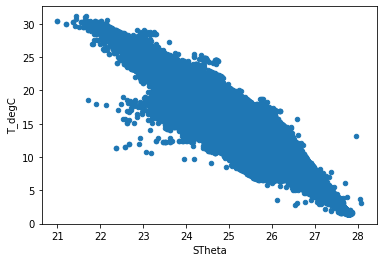

In [4]:
# 5. Remove obvious outliers 
df.plot(x='STheta', y='T_degC', kind='scatter')

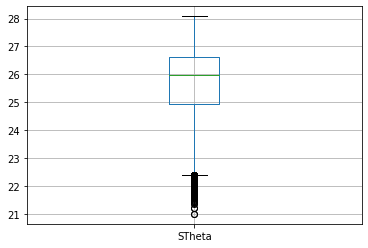

In [5]:
df.boxplot(column='STheta')

In [6]:
# Remove Outlier using wikipedia definition outlier < Q1-1.5*IQR and > Q3+1.5*IQR
Q1 = df.STheta.quantile(0.25)
Q3 =df.STheta.quantile(0.75)
IQR = Q3 - Q1
df[~(df.STheta < (Q1 - 1.5 * IQR)) |(df.STheta > (Q3 + 1.5 * IQR))]

,Salnty,STheta,T_degC,O2ml_L,Depthm
2160,33.0300,25.36400,10.300,5.900,0
2161,32.9200,23.56800,18.460,6.020,6
2162,32.9510,25.30400,10.290,6.040,10
2163,32.9900,25.33500,10.290,6.060,15
2164,33.0050,25.33900,10.330,6.040,20
...,...,...,...,...,...
864858,33.4083,23.87055,18.744,5.805,0
864859,33.4083,23.87072,18.744,5.805,2
864860,33.4150,23.88911,18.692,5.796,5
864861,33.4062,24.01426,18.161,5.816,10


In [7]:
# Using the same criteria in HW1 to remove outliers
df = df.loc[df['STheta']<=200]
df.shape

(661268, 5)

### Part B: Train / Test Split & Scaling

1) Create X & y objects:

- X object should be all 4 predictors. Shape should be: (661268, 4)

- y object should be just your target variable (T_degC): Shape should be: (661268, 1)

Hint for y: You will need to specify the shape you want. Trying converting y to a numpy array, and then using the .reshape() method.

2) Generate X_train, X_test, y_train & y_test. Use 80% for train & 20% for test.

3) Scale all features to improve convergence in Gradient Descent. It is highly encouraged that you review the appropriate method of handling scaling with train & test data.

Additional info on scaling with train & test sets: https://stats.stackexchange.com/questions/174823/how-to-apply-standardization-normalization-to-train-and-testset-if-prediction-i (Links to an external site.)

The easiest approach is to use the sklearn tool "StandardScaler" - more info here: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html (Links to an external site.)

You should create two new X objects:
- X_train_scaled
- X_test_scaled.

Note: X_test_scaled must use the scaling parameters learned from training data.

In [13]:
from sklearn.model_selection import train_test_split

In [151]:
# Train and test split into 80%/20%
X= df.loc[:,('Salnty','STheta','O2ml_L','Depthm')]
y=df.loc[:,'T_degC']
print(X.shape,y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(661268, 4) (661268,)


In [15]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()

# Standardize X_train and X_test
scaler_X.fit(X_train)

X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

### Part C: Linear Regression with sklearn

1) Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train_scaled & y_train.

2) Print out the coefficients (including the intercept)

3) Predict T_degC for the test data using lin_reg. Make sure to use X_test_scaled!

- Call predictions y_pred_sklearn

4) Calculate the following for the test data:

- mean squared error
- r-squared
- explained variance

5) Create a scatterplot that shows actual versus predicted values for the T_degC.

 

In [26]:
from sklearn import linear_model

In [177]:
# add x0=1 for each row
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
print('Coefficients: \n', lin_reg.coef_)
print('Intercept: \n', lin_reg.intercept_)

Coefficients: 
 [[ 1.63046569 -4.6345913   0.3020677  -0.47495536]]
Intercept: 
 [10.91541795]


In [181]:
y_pred_sklearn = lin_reg.predict(X_test_scaled)
MSE_sk=(((y_pred_sklearn - y_test)**2).sum() / len(y_test))[0]
print('The Mean Square Error is ',MSE_sk)
total_var = (((y_test - y_test.mean())**2).mean())[0]
exp_var_sk= total_var-MSE_sk
print('The Explained Variance is', exp_var_sk)
R2_sk = lin_reg.score(X_test_scaled, y_test)
print('R2 is', R2_sk)

The Mean Square Error is  0.11101117205433675
The Explained Variance is 17.702793702166055
R2 is 0.9937682503632344


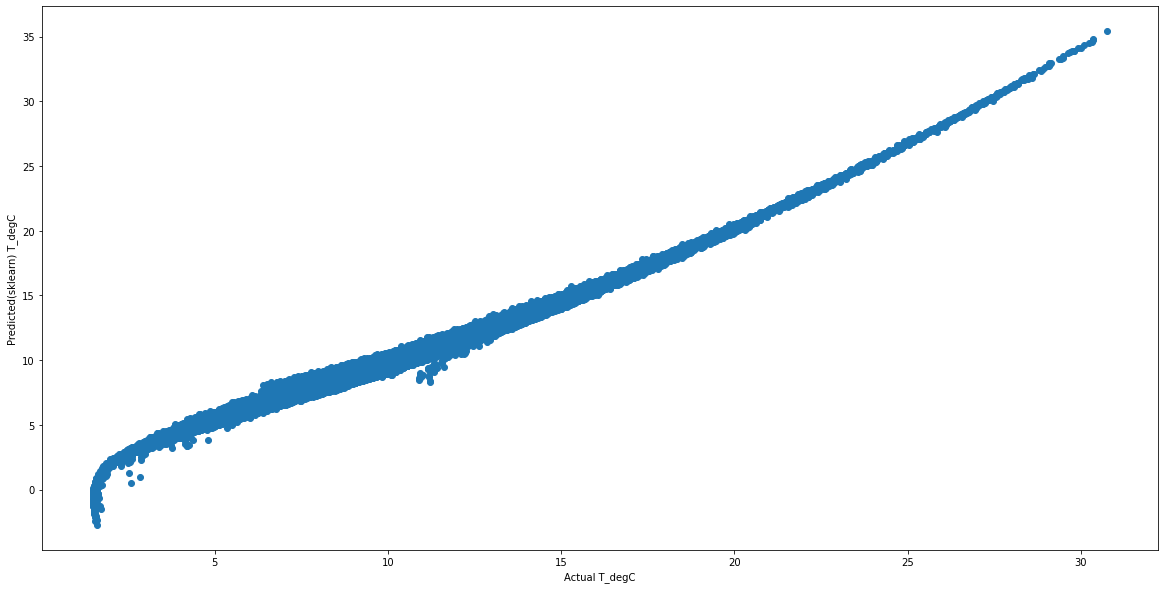

In [29]:
plt.figure(figsize=(20,10))
plt.plot(y_test, y_pred_sklearn,'o')
plt.xlabel('Actual T_degC')
plt.ylabel('Predicted(sklearn) T_degC');

### Part D: Gradient Descent Mini-Batch

Please make sure you are using Mini-Batch! Perform the following six steps for mini-batch sizes of: 50, 250, & 2000. Save all outputs

1) Similar to HW #1, you will need to add a column of 1s to X_train_scaled and X_test_scaled.

2) The cost function we will use for Gradient Descent is MSE (refer to Equation 4-3 in Hands-On Machine Learning Chapter 4).

Note: The Hands-on ML Github will be a helpful resource for solving Mini-Batch, but it does include a changing eta through using the learning_schedule function. Do not use a changing eta for this assignment, rather just use a static eta. This means you will need to make changes to the Github example for Mini-Batch.

3) Feel free to use any value for eta and epochs, but 0.1 eta and 100 epochs should work fine for this HW.

4) Calculate the following for the test data:

- mean squared error
- r-squared
- explained variance

5) Create a scatterplot that shows actual versus predicted values for the T_degC for the test data.

6) Given we are estimating parameters through gradient descent we also want to check how our error metrics look for training data. Calculate the following for the training data:

- mean squared error
- r-squared
- explained variance

 

In [182]:
#add a column of 1s to X_train_scaled and X_test_scaled
X_train_s_1 = np.c_[np.ones((X_train_scaled.shape[0],1)),X_train_scaled]
X_test_s_1 = np.c_[np.ones((X_test_scaled.shape[0],1)),X_test_scaled]

In [71]:
X_train_s_1=pd.DataFrame(X_train_s_1)
X_test_s_1=pd.DataFrame(X_test_s_1)
X_train_s_1.columns=['Intercept','Salnty','STheta','O2ml_L','Depthm']
X_test_s_1.columns=['Intercept','Salnty','STheta','O2ml_L','Depthm']

In [75]:
# Gradien Descent using Mini_Batches. Note: The Loss function used here is MSE.
def mini_batch_gradient_descent(X_b, y, n_epochs, minibatch_size, eta):
    m = len(X_b)

    np.random.seed(123)
    theta = np.random.randn(X_b.shape[1],1) 
    
    for epoch in range(n_epochs):
        shuffled_indices = np.random.choice(X_b.index, m, replace=False)
        X_b_shuffled = X_b.iloc[shuffled_indices,:]
        y_shuffled = y.iloc[shuffled_indices]
        y_shuffled = np.asarray(y_shuffled).reshape((len(y_shuffled),1))
        for i in range(0, m, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            derived_cost_function = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
            theta = theta - eta * derived_cost_function
    return(theta)

##### Estimates of the linear regression using the the mini-batch gradient descent on different batch sizes: 50, 250, and 2000. For each batch size we'll use 100 epochs and a 0.1 eta.

In [77]:
start = time.time()
theta_50 = mini_batch_gradient_descent(X_train_s_1 ,y_train, 100, 50, 0.1)
end = time.time()
time_50 = end - start
print("Mini-batch Gradient Descent with a 50 minibatch size")
print(theta_50)
print("MBGD 50 took about {} seconds.".format(round(time_50)))

Mini-batch Gradient Descent with a 50 minibatch size
                   0
Intercept  10.928360
Salnty      1.647848
STheta     -4.594201
O2ml_L      0.311581
Depthm     -0.447869
MBGD 50 took about 3578 seconds.


In [168]:
start = time.time()
theta_250 = mini_batch_gradient_descent(X_train_s_1 ,y_train, 100, 250, 0.1)
end = time.time()
time_250 = end - start
print("\nMini-batch Gradient Descent with a 250 minibatch size")
print(theta_250)
print("MBGD 250 took about {} seconds.".format(round(time_250)))


Mini-batch Gradient Descent with a 250 minibatch size
                   0
Intercept  10.926427
Salnty      1.633648
STheta     -4.622576
O2ml_L      0.296043
Depthm     -0.460250
MBGD 250 took about 685 seconds.


In [169]:
start = time.time()
theta_2000 = mini_batch_gradient_descent(X_train_s_1 ,y_train, 100, 2000, 0.1)
end = time.time()
time_2000 = end - start
print("\nMini-batch Gradient Descent with a 2000 minibatch size")
print(theta_2000)
print("MBGD 2000 took about {} seconds.".format(round(time_2000)))


Mini-batch Gradient Descent with a 2000 minibatch size
                   0
Intercept  10.918751
Salnty      1.626874
STheta     -4.623530
O2ml_L      0.297039
Depthm     -0.465736
MBGD 2000 took about 101 seconds.


In [152]:
# reindex y
y_train=pd.DataFrame(y_train).reset_index(drop=True)
y_train.columns=[0]
y_test=pd.DataFrame(y_test).reset_index(drop=True)
y_test.columns=[0]

In [166]:
# Total Variances
total_var_train = (((y_train - y_train.mean())**2).mean())[0]
total_var_test = (((y_test - y_test.mean())**2).mean())[0]

In [171]:
y_train_pred_50=theta_50.T.dot(X_train_s_1.T).T
y_test_pred_50=theta_50.T.dot(X_test_s_1.T).T

MSE_train_50=(((y_train_pred_50 - y_train)**2).sum() / len(y_train))[0]
MSE_test_50=(((y_test_pred_50 - y_test)**2).sum() / len(y_test))[0]

exp_var_train_50= total_var_train-MSE_train_50
exp_var_test_50= total_var_test-MSE_test_50

R2_train_50=exp_var_train_50/total_var_train
R2_test_50=exp_var_test_50/total_var_test

print('Minibatch_size = 50')
print("Train MSE:", MSE_train_50)
print("Test  MSE:", MSE_test_50)
print("Train Variance Explained:", exp_var_train_50)
print("Test Variance Explained:", exp_var_test_50)
print("Train R2:", R2_train_50)
print("Test  R2:", R2_test_50)

y_train_pred_250=theta_250.T.dot(X_train_s_1.T).T
y_test_pred_250=theta_250.T.dot(X_test_s_1.T).T

MSE_train_250=(((y_train_pred_250 - y_train)**2).sum() / len(y_train))[0]
MSE_test_250=(((y_test_pred_250 - y_test)**2).sum() / len(y_test))[0]

exp_var_train_250= total_var_train-MSE_train_250
exp_var_test_250= total_var_test-MSE_test_250

R2_train_250=exp_var_train_250/total_var_train
R2_test_250=exp_var_test_250/total_var_test

print('Minibatch_size = 250')
print("Train MSE:", MSE_train_250)
print("Test  MSE:", MSE_test_250)
print("Train Variance Explained:", exp_var_train_250)
print("Test Variance Explained:", exp_var_test_250)
print("Train R2:", R2_train_250)
print("Test  R2:", R2_test_250)

y_train_pred_2000=theta_2000.T.dot(X_train_s_1.T).T
y_test_pred_2000=theta_2000.T.dot(X_test_s_1.T).T

MSE_train_2000=(((y_train_pred_2000 - y_train)**2).sum() / len(y_train))[0]
MSE_test_2000=(((y_test_pred_2000 - y_test)**2).sum() / len(y_test))[0]

exp_var_train_2000= total_var_train-MSE_train_2000
exp_var_test_2000= total_var_test-MSE_test_2000

R2_train_2000=exp_var_train_2000/total_var_train
R2_test_2000=exp_var_test_2000/total_var_test

print('Minibatch_size = 2000')
print("Train MSE:", MSE_train_2000)
print("Test  MSE:", MSE_test_2000)
print("Train Variance Explained:", exp_var_train_2000)
print("Test Variance Explained:", exp_var_test_2000)
print("Train R2:", R2_train_2000)
print("Test  R2:", R2_test_2000)

Minibatch_size = 50
Train MSE: 0.11523333195632524
Test  MSE: 0.11545790597831176
Train Variance Explained: 17.73956124929288
Test Variance Explained: 17.69834696824208
Train R2: 0.9935460846983173
Test  R2: 0.9935186274468855
Minibatch_size = 250
Train MSE: 0.11173121372654117
Test  MSE: 0.11204539797142807
Train Variance Explained: 17.743063367522662
Test Variance Explained: 17.701759476248963
Train R2: 0.9937422291128524
Test  R2: 0.9937101928104323
Minibatch_size = 2000
Train MSE: 0.11101966157766562
Test  MSE: 0.11140531542899015
Train Variance Explained: 17.74377491967154
Test Variance Explained: 17.702399558791402
Train R2: 0.9937820812738862
Test  R2: 0.9937461246367298


Text(0.5, 1.0, 'Minibatch_size = 50')

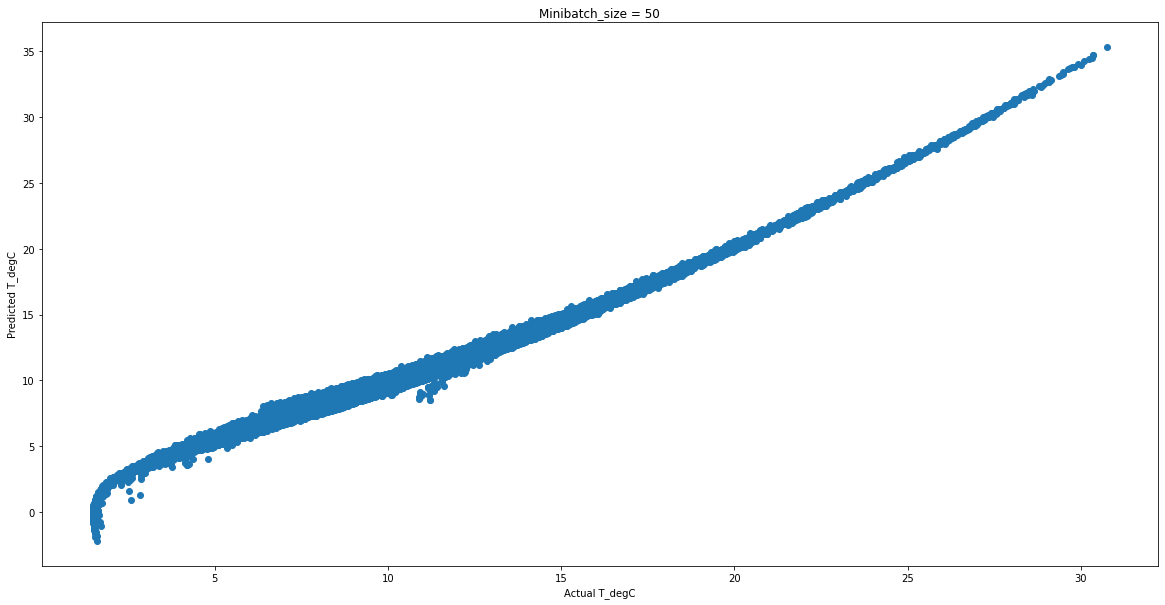

In [185]:
plt.figure(figsize=(20,10))
plt.plot(y_test, y_test_pred_50,'o')
plt.xlabel('Actual T_degC')
plt.ylabel('Predicted T_degC')
plt.title('Minibatch_size = 50')

Text(0.5, 1.0, 'Minibatch_size = 250')

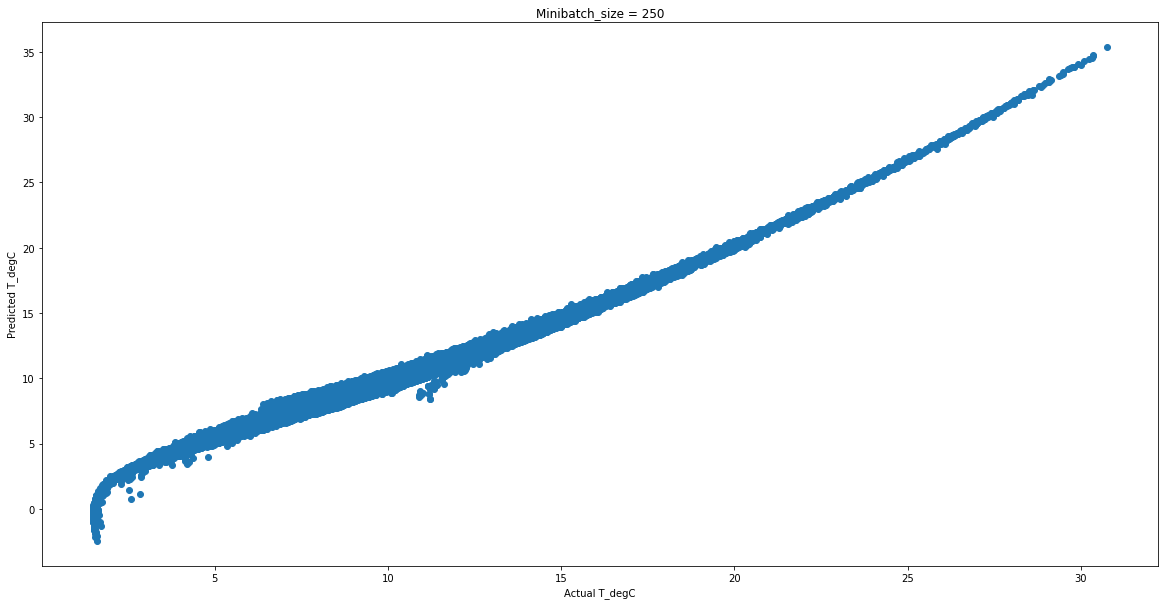

In [186]:
plt.figure(figsize=(20,10))
plt.plot(y_test, y_test_pred_250,'o')
plt.xlabel('Actual T_degC')
plt.ylabel('Predicted T_degC')
plt.title('Minibatch_size = 250')

Text(0.5, 1.0, 'Minibatch_size = 2000')

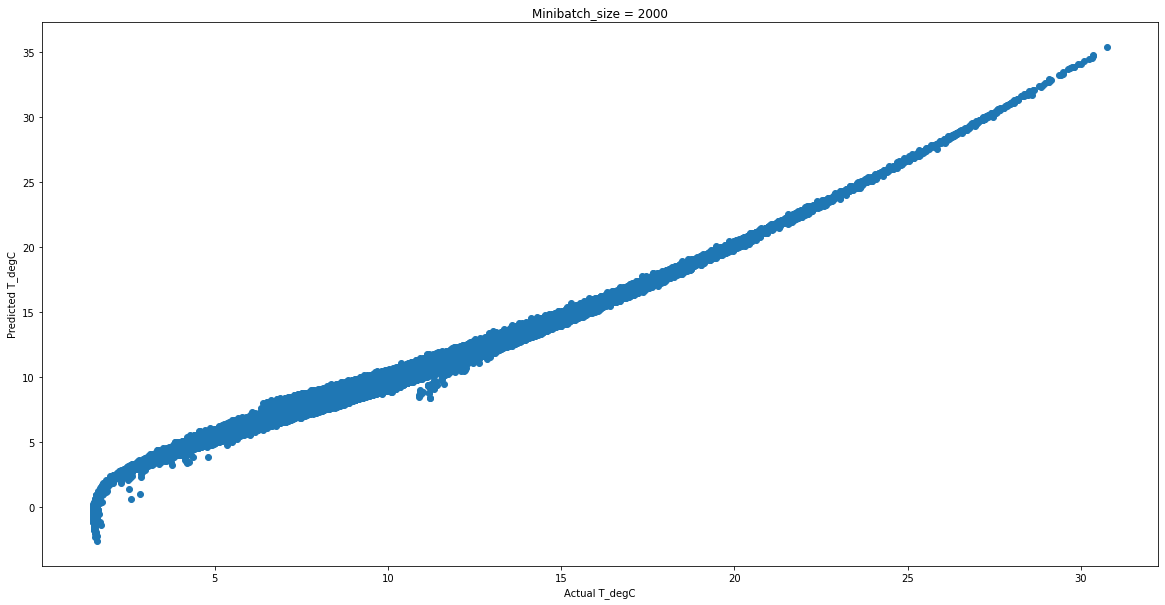

In [187]:
plt.figure(figsize=(20,10))
plt.plot(y_test, y_test_pred_2000,'o')
plt.xlabel('Actual T_degC')
plt.ylabel('Predicted T_degC')
plt.title('Minibatch_size = 2000')

### Part E: Conceptual Questions

##### 1) Describe how parameter estimation in Gradient Descent differs from using the normal equation.

Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. Gradient descent is generally faster than normal equation in identifying the optimal coeffcients, but they hardly settle at the optimal values.

Normal equation is another approach for finding the global minimum or the weights (W) for which cost is minimum.
Gradient descent is iterative process while Normal equation solve W analytically.
When using normal equation, computation can be expensive for very large datasets. Normal equation can not be used for datasets where the inverse of XTX may not exist (the matrix is non-invertible or singular, e.g., in case of perfect multicollinearity). 


##### 2) We used Mini-Batch Gradient descent here, but there are a variety of options for Gradient Descent. How is Mini-Batch Gradient Descent different from Stochastic Gradient Descent?

Stochastic gradient descent, often abbreviated SGD, is a variation of the gradient descent algorithm that calculates the error and updates the model coefficients using a random data point in the training dataset.

Mini-batch gradient descent is a variation of the gradient descent algorithm that splits the training dataset into small random batches that are used to calculate model error and update model coefficients.

##### 3) Identify your best-performing version of Gradient Descent and compare the error metrics for test data vs training data. Does this version of gradient descent show signs of overfitting? Explain.

With epoch=100 and eta=0.1, the Mini_batch=2000 version perfroms the best. It has the smallest training and test MSE and highest training and test R2. 

For this version, the train MSE is 0.11101966157766562 and test MSE is 0.11140531542899015. They are both very small. <br>
The percent change between the two MSEs is 0.3474%, which is very aslo small. We can conclude that this version does not show signs of overfitting. 

#### 4) Explain what the learning rate is for. Even though we did not, why might it be helpful to change the learning rate over time?
The learning rate is a tuning parameter in gradient descent that determines the step size at each iteration while moving toward a minimum of a loss function. Changing the learning rate over time can help to speed up convergence, while preventing overshooting.

##### 5) Why would a data scientist want to use early stopping in gradient descent? 
Early stopping is a form of regularization used to avoid overfitting when training a learner using gradient descent. Such methods update the learner so as to make it better fit the training data with each iteration. Up to a point, this improves the learner's performance on data outside of the training set. Past that point, however, improving the learner's fit to the training data comes at the expense of increased generalization error. Early stopping rules provide guidance as to how many iterations can be run before the learner begins to over-fit.
